In [0]:
!pip install mglearn
import pandas as pd
import mglearn as mglearn

In [0]:

from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset.keys()  # Keys of the bunchObject iris_dataset
# result dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

iris_dataset['data'][:5]  # return first 5 fields
print(iris_dataset['DESCR'])



In [0]:
print("Target names: {}".format(iris_dataset['target_names']))
print("Feature names: \n{}".format(iris_dataset['feature_names']))
print("Type of data: {}".format(type(iris_dataset['data'])))
print("Shape of data: {}".format(iris_dataset['data'].shape))   # shows 150 row, for columns for feature measurement


Target names: ['setosa' 'versicolor' 'virginica']
Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)


In [0]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))
print("Type of target: {}".format(type(iris_dataset['target'])))
#The target array contains the species of each of the flowers that were measured, also as a NumPy array:
print("Shape of target: {}".format(iris_dataset['target'].shape))
print("Target:\n{}".format(iris_dataset['target']))
# The meanings of the numbers are given by the iris['target_names'] array: 0 means setosa, 1 means versicolor, and 2 means virginica.
print("Target:\n{}".format(iris_dataset['target_names']))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Target:
['setosa' 'versicolor' 'virginica']


In [0]:
from sklearn.model_selection import train_test_split
# In scikit-learn, data is usually denoted with a capital X, 
# while labels are denoted by a lowercase y. This is inspired 
# by the standard formulation f(x)=y in mathematics, where x 
# is the input to a function and y is the output. Following more 
# conventions from mathematics, we use a capital X because the data 
# is a two-dimensional array (a matrix) and a lowercase y because the 
#target is a one-dimensional array (a vector).
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

#The output of the train_test_split function is X_train, X_test, y_train, and y_test, 
#which are all NumPy arrays. X_train contains 75% of the rows of the dataset, and 
# X_test contains the remaining 25%:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))



X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72e1c40518>,
      dtype=object)

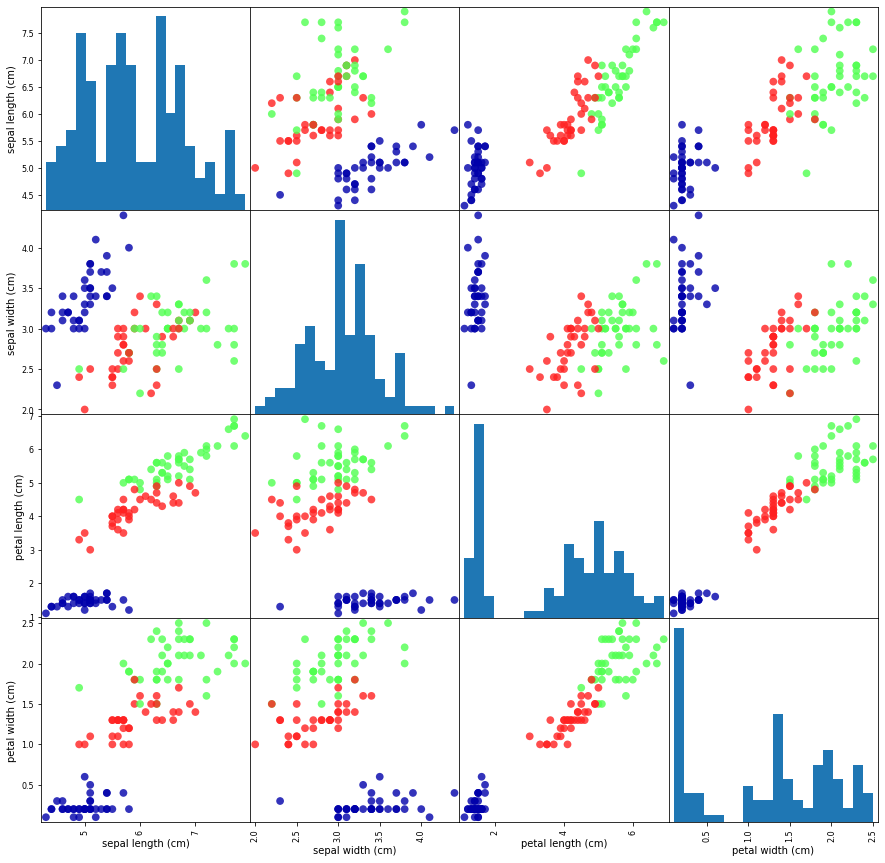

In [0]:

 
# Use a scatter plot to visualise data for inconsistencies

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
#Making Predictions
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

# Predict on the test data
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']
Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
